# Critical lines, Caustics and Light Curves of two point mass lenses system at the same redshift

## The basic ideas to get the:
 - Caustics: by Inverse Ray Shooting
 - Critical lines: by derive the Jacobian Matrix from the lens equation, then compute the magnification using the determine of the Jacobian Matrix
 - Light Curve: Using the result from Invers Ray Shooting

In [4]:
#import related packages and settings
import sys, time
sys.path.append("../")
from utils import *
from two_pmnegq_inverse_ray_shoot_191206 import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# savebasedir = "../temp/"

In [5]:
# Set mass ratios, positions, angle range, output image size
xylim = 4.5 # light ray range
q = 0.5 # mass ratio
posscale = 0.5 # position of point masses
imgsz = 2048 # image size in pixel
num = 3000 # ray num
method = "slow"# fast(memory comsumming) and slow (save memory)
xlim, ylim = (-xylim,xylim), (-xylim,xylim)
stupstr = "{}pms_{}q_{}X_{}rays".format(2,q,posscale,num)
ImgSize = (imgsz,imgsz)

In [6]:
srcplaneIMG, imgplaneIMG =  genimgs(xylim = xylim, q = q, posscale = posscale, imgsz = imgsz, num = num, method = "slow")
srcplaneIMG2, imgplaneIMG2 =  genimgs(xylim = xylim, q = -q, posscale = posscale, imgsz = imgsz, num = num, method = "slow")

100%|██████████| 3000/3000 [00:32<00:00, 91.43it/s]


In [7]:
# generate light curve
# radius, npoints = 5, 40 # radius in pixel
sourcesizeR_E = 0.03 # source size 0.03 R_E
radius = int(sourcesizeR_E*ImgSize[1]/(xlim[1]-xlim[0]) + 0.5)
# print(radius)# 12
# radius = 15# radius in pixel
k = 0.5
kscale = 0.6 # source position for generate light curve
# B = np.linspace( 1, -1 , 5)*kscale
B = np.linspace( 1, -1 , 3)*kscale
KB = [(k,b) for b in B]
cname = ["r","g","y","k","c","m","w"]
COLLOR = cname[:len(KB)]
Y, LC, LC2 = {}, {}, {}
scale = 0.8
# x = np.linspace(xlim[0]*scale, xlim[1]*scale, int(ImgSize[1]*scale/2))#, endpoint=False
x = np.linspace(xlim[0]*scale, xlim[1]*scale, int(ImgSize[1]*scale/radius*3))#, endpoint=False
for kb in KB:
    k,b = kb[0], kb[1]
    Y[kb] = k*x + b
#     LC[kb] = twolens.com_lightcurve(srcplaneIMG, x, Y[kb], xlim, ylim, radius, npoints)
    LC[kb] = com_lightcurve_v2(srcplaneIMG, x, Y[kb], xlim, ylim, radius)
    LC2[kb] = com_lightcurve_v2(srcplaneIMG2, x, Y[kb], xlim, ylim, radius)

Generating lightcurve
Generating lightcurve
Generating lightcurve
Generating lightcurve
Generating lightcurve
Generating lightcurve


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in log10


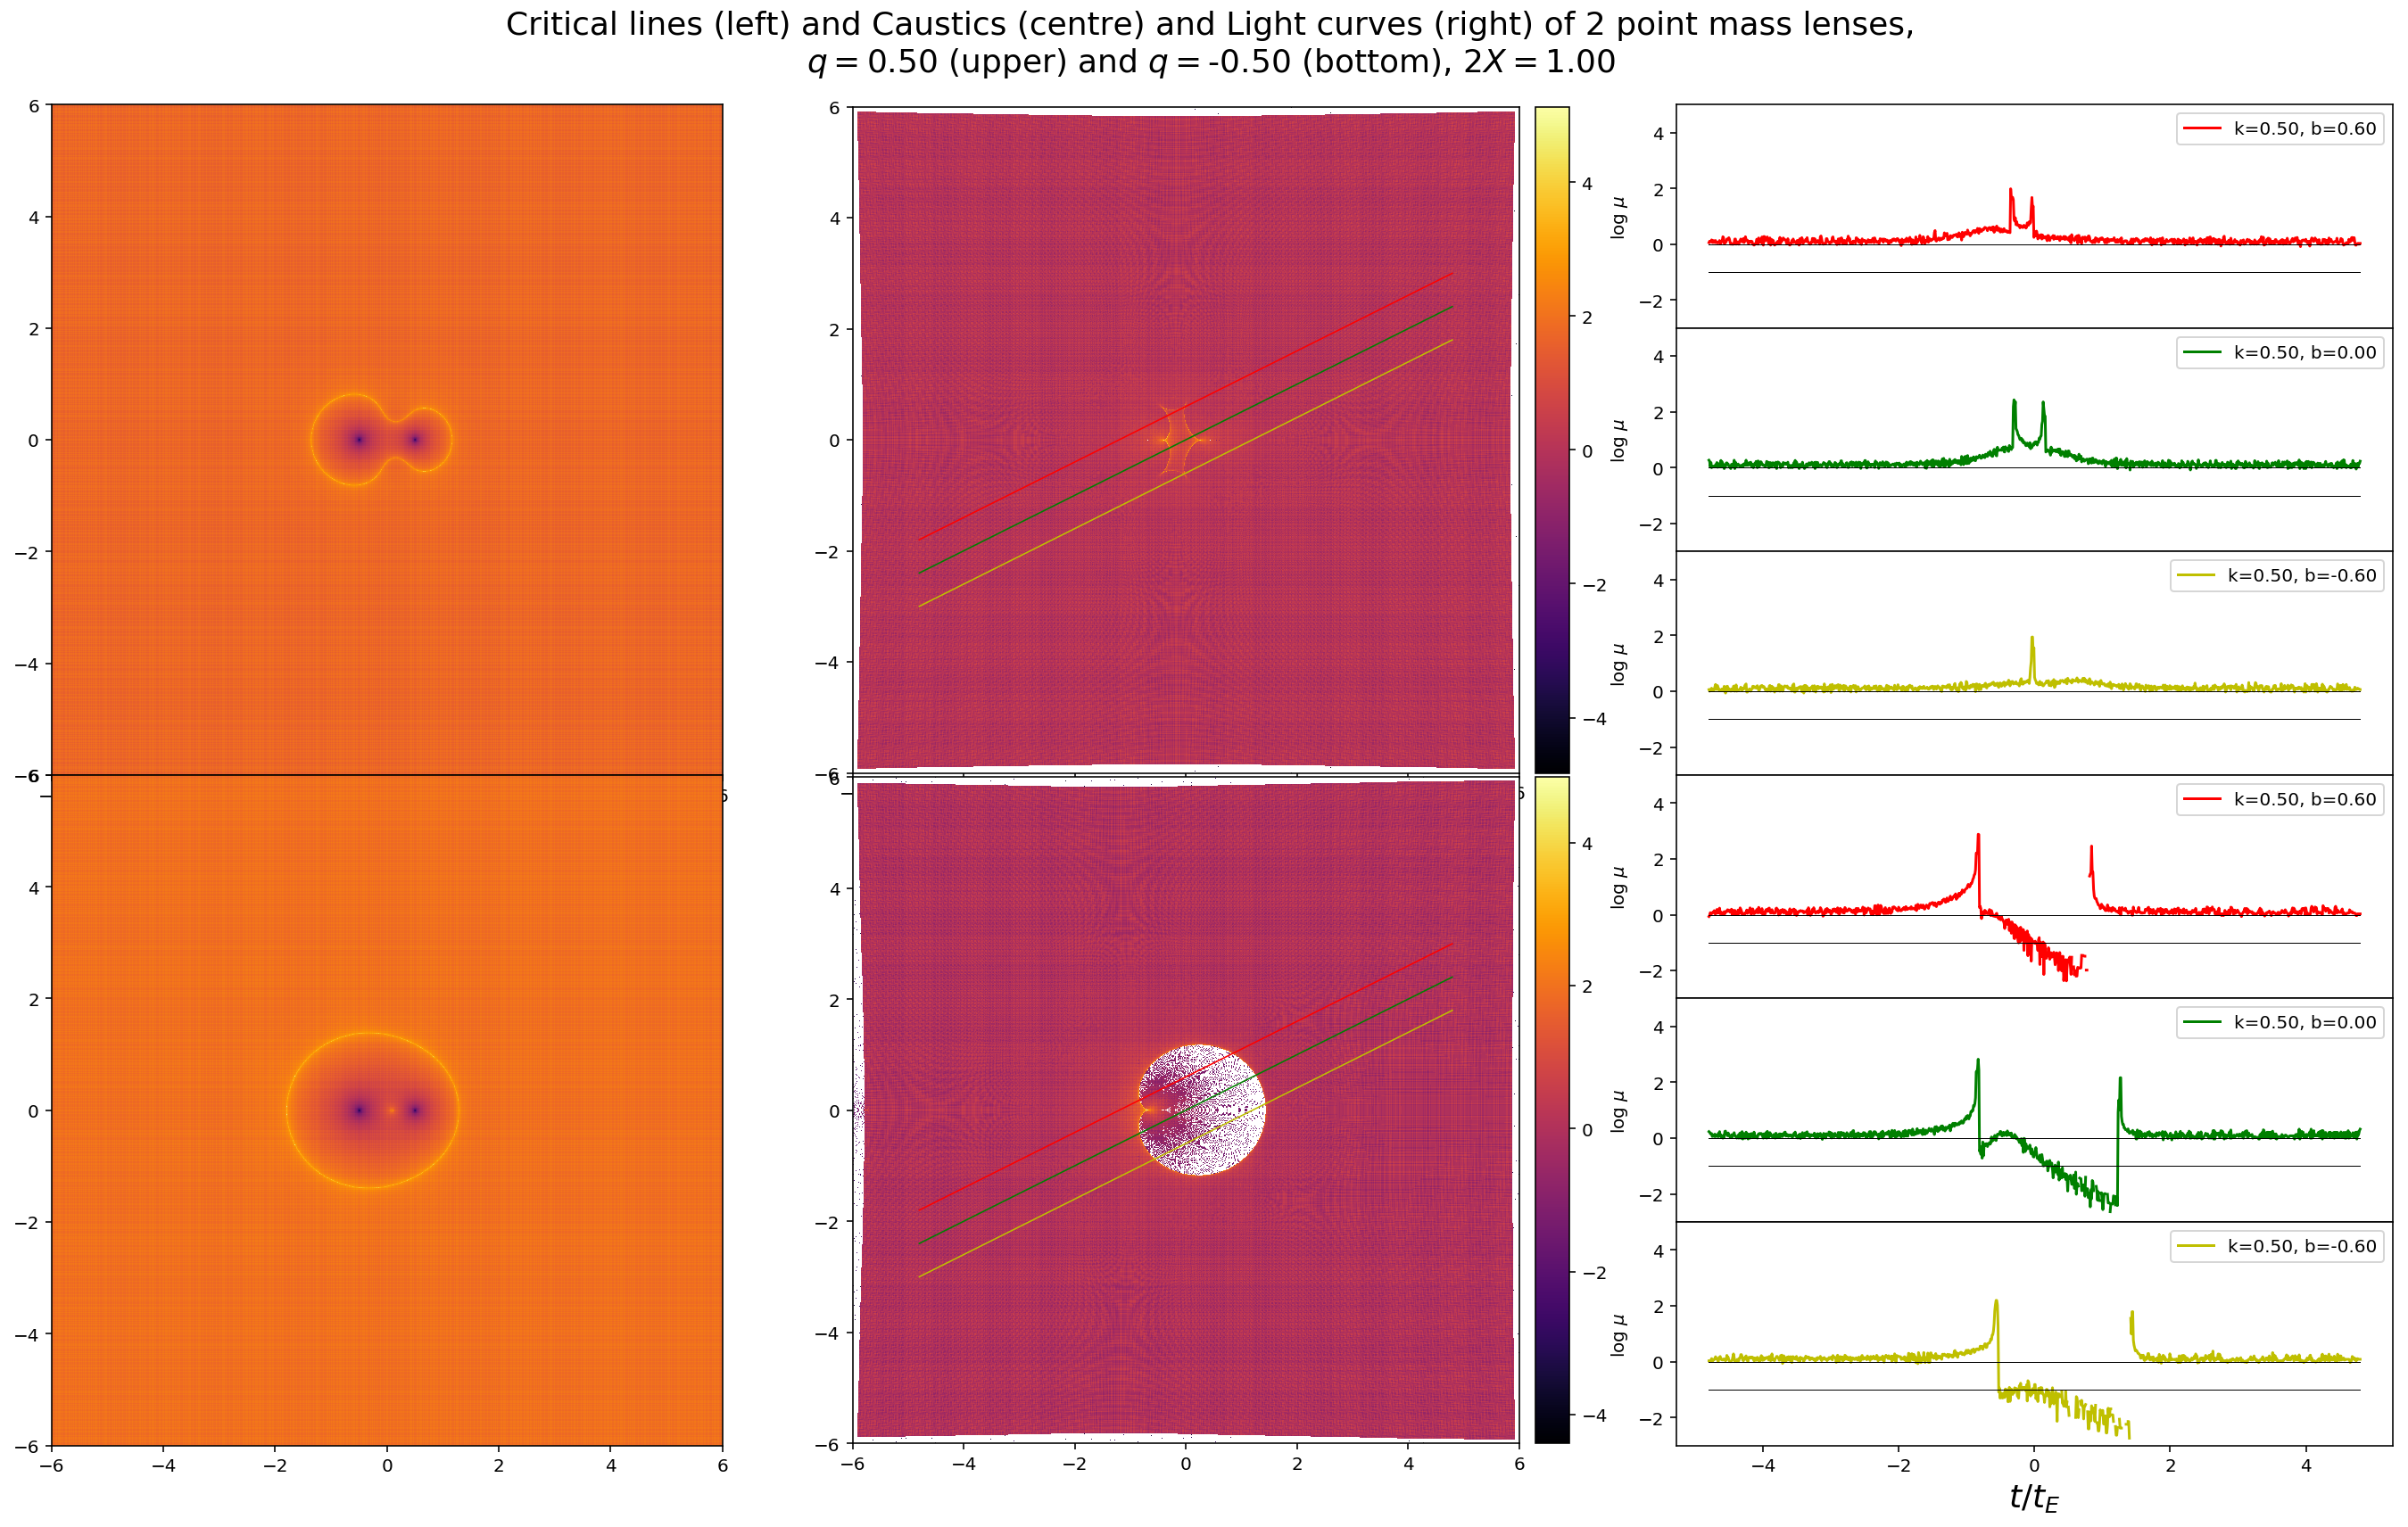

In [27]:
# # plot critical lines and caustics
timestr=time.ctime().replace(" ","")[3:-4]
fontsize = 18
cmap = plt.cm.get_cmap('inferno')#viridis, plasma
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : fontsize,
}
fig3 = plt.figure()
fig3.set_size_inches(20,12)
plt.subplots_adjust(left=0.04, top = 0.92, bottom = 0.05, right=0.96, hspace = 0, wspace = 0)
# plt.subplots_adjust(hspace=.0)
plt.margins(0,0)

grid = plt.GridSpec(6, 3, wspace=0.15, hspace=0)#, wspace=0.5, hspace=0.5
plt.subplot(grid[0:3,0])
# plt.subplot(131)

imgplaneim = plt.imshow(np.log10(imgplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# plt.colorbar()
# add_colorbar(imgplaneim)
# title = "Critical lines of {} point masses, q={:.2f}, X = {:.2f}, (Log scale)".format(len(masses),q,posscale)
# plt.title(title)
# plt.xlabel(r"$\xi_1(D_d\theta_E)$", font1)
# plt.ylabel(r"$\xi_2(D_d\theta_E)$", font1)

plt.subplot(grid[0:3,1])
# plt.subplot(132)
# cmap = plt.cm.get_cmap('viridis') # 'Paired', viridis, gist_ncar, 
srcplaneim = plt.imshow(np.log10(srcplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# plt.colorbar()
add_colorbar(srcplaneim)
# title = "Caustics of {} point masses(blue/red - smaller/larger than 0),\n, q={:.2f}, X = {:.2f}, (Log scale)".format(len(masses),q,posscale)
# for m, a, b in zip(masses , xs, ys):  
#     if m < 0:
#         c = "b"
#     else:
#         c = "r"
#     plt.scatter(a,b,color=c,marker="x",s=0.1)
# # plt.title(title)

cnt = 0
for kb in KB:
    plt.plot(x,Y[kb],color=COLLOR[cnt],linewidth=0.8)#-ylim[0]
    cnt += 1
# plt.xlabel(r"$\eta_1(D_s\theta_E)$", font1)
# plt.ylabel(r"$\eta_2(D_s\theta_E)$", font1)


#light curve
axes = [1 for i in range(len(KB)*2)]
cnt = 0

for kb in KB:
#     axes[cnt] = plt.subplot(len(KB), 2, cnt*2+2) #int("42"+str(cnt*2+2))
    axes[cnt] = plt.subplot(grid[cnt,2])
#     plt.tick_params(labelsize=fontsize)
    label = "k={:.2f}, b={:.2f}".format(kb[0],kb[1])
    axes[cnt].plot(x,np.log10(LC[kb]),color=COLLOR[cnt],label=label)
    axes[cnt].plot([x[0],x[-1]],[0,0],linewidth=0.5,c="k")
    axes[cnt].plot([x[0],x[-1]],[-1,-1],linewidth=0.5,c="k")
    axes[cnt].set_ylim([-3, 5])
    axes[cnt].set_ylabel(r"$\log$ $\mu$")#
    
#     axes[cnt].plot(x,(LC[kb]),color=COLLOR[cnt],label=label)
#     axes[cnt].plot([x[0],x[-1]],[1,1],linewidth=0.5)
#     axes[cnt].set_ylim([-1, 10])
#     axes[cnt].set_ylabel(r"$\mu$")#,fontsize = fontsize
    
    
    axes[cnt].legend()#prop=font1
#     axes[cnt].set_xlabel(r"$t/t_E$",fontsize = fontsize)
    
    if cnt == 0:
        pass
#         title = r"Light Curve of a source star with radius {:.2f} $R_E$".format(sourcesizeR_E)+"\n"+r"2 point mass ratio: $q =$ {:.2f}, separation: $2X =$ {:.2f}".format(q,2*posscale)
#         plt.title(title,fontsize=fontsize)
    
    cnt += 1

##########################################################################################################    

plt.subplot(grid[3:6,0])
# plt.subplot(131)
# cmap = plt.cm.get_cmap('viridis')
imgplaneim = plt.imshow(np.log10(imgplaneIMG2), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# plt.colorbar()
# add_colorbar(imgplaneim)
# title = "Critical lines of {} point masses, q={:.2f}, X = {:.2f}, (Log scale)".format(len(masses),q,posscale)
# plt.title(title)
# plt.xlabel(r"$\xi_1(D_d\theta_E)$", font1)
# plt.ylabel(r"$\xi_2(D_d\theta_E)$", font1)

plt.subplot(grid[3:6,1])
# plt.subplot(132)
# cmap = plt.cm.get_cmap('viridis') # 'Paired', viridis, gist_ncar, 
srcplaneim = plt.imshow(np.log10(srcplaneIMG2), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# plt.colorbar()
add_colorbar(srcplaneim)
# title = "Caustics of {} point masses(blue/red - smaller/larger than 0),\n, q={:.2f}, X = {:.2f}, (Log scale)".format(len(masses),q,posscale)
# for m, a, b in zip(masses , xs, ys):  
#     if m < 0:
#         c = "b"
#     else:
#         c = "r"
#     plt.scatter(a,b,color=c,marker="x",s=0.1)
# # plt.title(title)

cnt = 0
for kb in KB:
    plt.plot(x,Y[kb],color=COLLOR[cnt],linewidth=0.8)#-ylim[0]
    cnt += 1
# plt.xlabel(r"$\eta_1(D_s\theta_E)$", font1)
# plt.ylabel(r"$\eta_2(D_s\theta_E)$", font1)



#light curve
# axes = [1 for i in range(len(KB))]
cnt = len(KB)

for kb in KB:
#     axes[cnt] = plt.subplot(len(KB), 2, cnt*2+2) #int("42"+str(cnt*2+2))
    axes[cnt] = plt.subplot(grid[cnt,2])
#     plt.tick_params(labelsize=fontsize)
    label = "k={:.2f}, b={:.2f}".format(kb[0],kb[1])
    
    axes[cnt].plot(x,np.log10(LC2[kb]),color=COLLOR[cnt%len(KB)],label=label)
    axes[cnt].plot([x[0],x[-1]],[0,0],c="k",linewidth=0.5)
    axes[cnt].plot([x[0],x[-1]],[-1,-1],c="k",linewidth=0.5)
    axes[cnt].set_ylim([-3, 5])
    axes[cnt].set_ylabel(r"$\log$ $\mu$")#
    
#     axes[cnt].plot(x,(LC[kb]),color=COLLOR[cnt],label=label)
#     axes[cnt].plot([x[0],x[-1]],[1,1],linewidth=0.5)
#     axes[cnt].set_ylim([-1, 10])
#     axes[cnt].set_ylabel(r"$\mu$")#,fontsize = fontsize
    
    
    axes[cnt].legend()#prop=font1
#     axes[cnt].set_xlabel(r"$t/t_E$",fontsize = fontsize)
    
    if cnt == 0:
        pass
#         pass
#         title = r"Light Curve of a source star with radius {:.2f} $R_E$".format(sourcesizeR_E)+"\n"+r"2 point mass ratio: $q =$ {:.2f}, separation: $2X =$ {:.2f}".format(q,2*posscale)
#         plt.title(title,fontsize=fontsize)
    
    cnt += 1
axes[cnt-1].set_xlabel(r"$t/t_E$",fontsize = fontsize)
# fig3.suptitle('Main title') # or plt.suptitle('Main title')
title = "Critical lines (left) and Caustics (centre) and Light curves (right) of 2 point mass lenses,\n"+r"$q = ${:.2f} (upper) and $q = ${:.2f} (bottom), $2X = ${:.2f}".format(q, -q,2*posscale)
plt.suptitle(title, size=18)
lightcurve_filename = "../resimgs/foranndy/lightcurve_{}_{}.png".format(timestr, stupstr)

In [28]:
if input("save imgs or not? (y/n)>>>: ")=="y":
#     fig1.savefig(caustics_filename, format='png', bbox_inches='tight', dpi=300, pad_inches = 0)#, transparent=True
#     fig2.savefig(lightcurve_filename, format='png', bbox_inches='tight', dpi=300, pad_inches = 0)#, transparent=True
    fig3.savefig(lightcurve_filename, format='png', bbox_inches='tight', dpi=300, pad_inches = 0)#, transparent=True

save imgs or not? (y/n)>>>: y


In [ ]:
# 12,3 configuration
# # # plot critical lines and caustics
# timestr=time.ctime().replace(" ","")[3:-4]
# fontsize = 18
# cmap = plt.cm.get_cmap('inferno')#viridis, plasma
# font1 = {'family' : 'Times New Roman',
# 'weight' : 'normal',
# 'size'   : fontsize,
# }
# fig3 = plt.figure()
# fig3.set_size_inches(16,16)
# plt.subplots_adjust(left=0.04, top = 0.93, bottom = 0.05, right=0.96, hspace = 0, wspace = 0)
# plt.margins(0,0)

# grid = plt.GridSpec(12, 3, wspace=0.2, hspace=0)#, wspace=0.5, hspace=0.5
# plt.subplot(grid[0:3,0])
# # plt.subplot(131)

# imgplaneim = plt.imshow(np.log10(imgplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# # plt.colorbar()
# add_colorbar(imgplaneim)
# # title = "Critical lines of {} point masses, q={:.2f}, X = {:.2f}, (Log scale)".format(len(masses),q,posscale)
# # plt.title(title)
# # plt.xlabel(r"$\xi_1(D_d\theta_E)$", font1)
# # plt.ylabel(r"$\xi_2(D_d\theta_E)$", font1)

# plt.subplot(grid[3:6,0])
# # plt.subplot(132)
# # cmap = plt.cm.get_cmap('viridis') # 'Paired', viridis, gist_ncar, 
# srcplaneim = plt.imshow(np.log10(srcplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# # plt.colorbar()
# add_colorbar(srcplaneim)
# # title = "Caustics of {} point masses(blue/red - smaller/larger than 0),\n, q={:.2f}, X = {:.2f}, (Log scale)".format(len(masses),q,posscale)
# # for m, a, b in zip(masses , xs, ys):  
# #     if m < 0:
# #         c = "b"
# #     else:
# #         c = "r"
# #     plt.scatter(a,b,color=c,marker="x",s=0.1)
# # # plt.title(title)

# cnt = 0
# for kb in KB:
#     plt.plot(x,Y[kb],color=COLLOR[cnt],linewidth=0.8)#-ylim[0]
#     cnt += 1
# # plt.xlabel(r"$\eta_1(D_s\theta_E)$", font1)
# # plt.ylabel(r"$\eta_2(D_s\theta_E)$", font1)


# #light curve
# axes = [1 for i in range(len(KB)*2)]
# cnt = 0

# for kb in KB:
# #     axes[cnt] = plt.subplot(len(KB), 2, cnt*2+2) #int("42"+str(cnt*2+2))
#     axes[cnt] = plt.subplot(grid[cnt*2:cnt*2+2,1:3])
# #     plt.tick_params(labelsize=fontsize)
#     label = "k={:.2f}, b={:.2f}".format(kb[0],kb[1])
#     axes[cnt].plot(x,np.log10(LC[kb]),color=COLLOR[cnt],label=label)
#     axes[cnt].plot([x[0],x[-1]],[0,0],linewidth=0.5,c="k")
#     axes[cnt].plot([x[0],x[-1]],[-1,-1],linewidth=0.5,c="k")
#     axes[cnt].set_ylim([-3, 5])
#     axes[cnt].set_ylabel(r"$\log$ $\mu$")#
    
# #     axes[cnt].plot(x,(LC[kb]),color=COLLOR[cnt],label=label)
# #     axes[cnt].plot([x[0],x[-1]],[1,1],linewidth=0.5)
# #     axes[cnt].set_ylim([-1, 10])
# #     axes[cnt].set_ylabel(r"$\mu$")#,fontsize = fontsize
    
    
#     axes[cnt].legend()#prop=font1
# #     axes[cnt].set_xlabel(r"$t/t_E$",fontsize = fontsize)
    
#     if cnt == 0:
#         pass
# #         title = r"Light Curve of a source star with radius {:.2f} $R_E$".format(sourcesizeR_E)+"\n"+r"2 point mass ratio: $q =$ {:.2f}, separation: $2X =$ {:.2f}".format(q,2*posscale)
# #         plt.title(title,fontsize=fontsize)
    
#     cnt += 1

# ##########################################################################################################    

# plt.subplot(grid[6:9,0])
# # plt.subplot(131)
# # cmap = plt.cm.get_cmap('viridis')
# imgplaneim = plt.imshow(np.log10(imgplaneIMG2), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# # plt.colorbar()
# add_colorbar(imgplaneim)
# # title = "Critical lines of {} point masses, q={:.2f}, X = {:.2f}, (Log scale)".format(len(masses),q,posscale)
# # plt.title(title)
# # plt.xlabel(r"$\xi_1(D_d\theta_E)$", font1)
# # plt.ylabel(r"$\xi_2(D_d\theta_E)$", font1)

# plt.subplot(grid[9:12,0])
# # plt.subplot(132)
# # cmap = plt.cm.get_cmap('viridis') # 'Paired', viridis, gist_ncar, 
# srcplaneim = plt.imshow(np.log10(srcplaneIMG2), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# # plt.colorbar()
# add_colorbar(srcplaneim)
# # title = "Caustics of {} point masses(blue/red - smaller/larger than 0),\n, q={:.2f}, X = {:.2f}, (Log scale)".format(len(masses),q,posscale)
# # for m, a, b in zip(masses , xs, ys):  
# #     if m < 0:
# #         c = "b"
# #     else:
# #         c = "r"
# #     plt.scatter(a,b,color=c,marker="x",s=0.1)
# # # plt.title(title)

# cnt = 0
# for kb in KB:
#     plt.plot(x,Y[kb],color=COLLOR[cnt],linewidth=0.8)#-ylim[0]
#     cnt += 1
# # plt.xlabel(r"$\eta_1(D_s\theta_E)$", font1)
# # plt.ylabel(r"$\eta_2(D_s\theta_E)$", font1)



# #light curve
# # axes = [1 for i in range(len(KB))]
# cnt = len(KB)

# for kb in KB:
# #     axes[cnt] = plt.subplot(len(KB), 2, cnt*2+2) #int("42"+str(cnt*2+2))
#     axes[cnt] = plt.subplot(grid[cnt*2:cnt*2+2,1:3])
# #     plt.tick_params(labelsize=fontsize)
#     label = "k={:.2f}, b={:.2f}".format(kb[0],kb[1])
    
#     axes[cnt].plot(x,np.log10(LC2[kb]),color=COLLOR[cnt%len(KB)],label=label)
#     axes[cnt].plot([x[0],x[-1]],[0,0],c="k",linewidth=0.5)
#     axes[cnt].plot([x[0],x[-1]],[-1,-1],c="k",linewidth=0.5)
#     axes[cnt].set_ylim([-3, 5])
#     axes[cnt].set_ylabel(r"$\log$ $\mu$")#
    
# #     axes[cnt].plot(x,(LC[kb]),color=COLLOR[cnt],label=label)
# #     axes[cnt].plot([x[0],x[-1]],[1,1],linewidth=0.5)
# #     axes[cnt].set_ylim([-1, 10])
# #     axes[cnt].set_ylabel(r"$\mu$")#,fontsize = fontsize
    
    
#     axes[cnt].legend()#prop=font1
# #     axes[cnt].set_xlabel(r"$t/t_E$",fontsize = fontsize)
    
#     if cnt == 0:
#         pass
# #         pass
# #         title = r"Light Curve of a source star with radius {:.2f} $R_E$".format(sourcesizeR_E)+"\n"+r"2 point mass ratio: $q =$ {:.2f}, separation: $2X =$ {:.2f}".format(q,2*posscale)
# #         plt.title(title,fontsize=fontsize)
    
#     cnt += 1
# axes[cnt-1].set_xlabel(r"$t/t_E$",fontsize = fontsize)
# # fig3.suptitle('Main title') # or plt.suptitle('Main title')
# title = "Critical lines and Caustics (left) and Light curves (right) of 2 point mass lenses,\n"+r"$q = ${:.2f} (upper) and $q = ${:.2f} (bottom), $2X = ${:.2f}".format(q, -q,2*posscale)
# plt.suptitle(title, size=20)
# plt.subplots_adjust(hspace=.0)
# lightcurve_filename = "../resimgs/foranndy/lightcurve_{}_{}.png".format(timestr, stupstr)

In [ ]:

# fig1 = plt.figure()
# fig1.set_size_inches(16,9)
# plt.subplots_adjust(left=0.04, top = 0.9, bottom = 0.05, right=0.96, hspace = 0.13, wspace = 0.13)
# plt.subplot(122)
# cmap = plt.cm.get_cmap('viridis') # 'Paired', viridis, gist_ncar, 
# srcplaneim = plt.imshow(np.log10(srcplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# # plt.colorbar()
# add_colorbar(srcplaneim)
# title = "Caustics of {} point masses, q={:.2f}, X = {:.2f}, (Log scale)".format(len(masses),q,posscale)
# plt.title(title)
# plt.xlabel(r"$r_1$", fontsize = fontsize)
# plt.ylabel(r"$r_2$", fontsize = fontsize)


# plt.subplot(121)
# cmap = plt.cm.get_cmap('viridis')
# imgplaneim = plt.imshow(np.log10(imgplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# # plt.colorbar()
# add_colorbar(imgplaneim)
# title = "Critical lines of {} point masses, q={:.2f}, X = {:.2f}, (Log scale)".format(len(masses),q,posscale)
# plt.title(title)
# plt.xlabel(r"$r_1$", fontsize = fontsize)
# plt.ylabel(r"$r_2$", fontsize = fontsize)

# plt.margins(0,0)
# 
# caustics_filename = "../resimgs/foranndy/Caustics_{}_{}.png".format(timestr, stupstr)

In [ ]:
# fig2 = plt.figure()
# fig2.set_size_inches(16,9)
# plt.subplots_adjust(left=0.04, top = 0.9, bottom = 0.05, right=0.96, hspace = 0.13, wspace = 0.2)
# plt.margins(0,0)
# plt.subplot(121)
# cmap = plt.cm.get_cmap('viridis') # 'Paired', viridis, gist_ncar, 
# srcplaneim = plt.imshow(np.log10(srcplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# # plt.colorbar()
# add_colorbar(srcplaneim)
# title = "Caustics of {} point masses(blue/red - smaller/larger than 0),\n, q={:.2f}, X = {:.2f}, (Log scale)".format(len(masses),q,posscale)
# for m, a, b in zip(masses , xs, ys):  
#     if m < 0:
#         c = "b"
#     else:
#         c = "r"
#     plt.scatter(a,b,color=c,marker="x")
# plt.title(title)

# cnt = 0
# for kb in KB:
#     plt.plot(x,Y[kb],color=COLLOR[cnt])#-ylim[0]
#     cnt += 1
# plt.xlabel(r"$r_1$", fontsize = fontsize)
# plt.ylabel(r"$r_2$", fontsize = fontsize)
# axes = [1 for i in range(len(KB))]
# cnt = 0

# for kb in KB:
#     axes[cnt] = plt.subplot(len(KB), 2, cnt*2+2) #int("42"+str(cnt*2+2))
#     label = "k={:.2f}, b={:.2f}".format(kb[0],kb[1])
#     axes[cnt].plot(x,np.log10(LC[kb]),color=COLLOR[cnt],label=label)
# #     axes[cnt].plot(x,(LC[kb]),color=COLLOR[cnt],label=label)

#     axes[cnt].set_ylim([-4, 5])
#     axes[cnt].legend()
#     axes[cnt].set_xlabel(r"$t/t_E$",fontsize = fontsize)
#     axes[cnt].set_ylabel(r"$\log$ $\mu$",fontsize = fontsize)
#     if cnt == 0:
#         pass
#         # plt.title("Light Curve")
    
#     cnt += 1
# plt.subplots_adjust(hspace=.0)
# lightcurve_filename = "../resimgs/foranndy/lightcurve_{}_{}.png".format(timestr, stupstr)